<a href="https://colab.research.google.com/github/shreya1110-dev/MTechCodeFiles/blob/main/Assignments/Sem1/DeepNeuralNetworks/Assignment1/LinearAndMLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Neural Networks - Programming Assignment
## Comparing Linear Models and Multi-Layer Perceptrons

**Student Name:** _Shreya Sriram__________________  
**Student ID:** ________2025AA05656___________  
**Date:** _________9-NOV-2025__________

---

## ⚠️ IMPORTANT INSTRUCTIONS

1. **Complete ALL sections** marked with `TODO`
2. **DO NOT modify** the `get_assignment_results()` function structure
3. **Fill in all values accurately** - these will be auto-verified
4. **After submission**, you'll receive a verification quiz based on YOUR results
5. **Run all cells** before submitting (Kernel → Restart & Run All)

---

In [5]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)
print('✓ Libraries imported successfully')

✓ Libraries imported successfully


## Section 1: Dataset Selection and Loading

**Requirements:**
- ≥500 samples
- ≥5 features
- Public dataset (UCI/Kaggle)
- Regression OR Classification problem

In [6]:
data = pd.read_csv('Loan Eligibility Prediction.csv')

# Dataset information (TODO: Fill these)
dataset_name = "Loan Eligibility prediction"  # e.g., "Breast Cancer Wisconsin"
dataset_source = "Kaggle"  # e.g., "UCI ML Repository"
n_samples = 614      # Total number of rows
n_features = 13    # Number of features (excluding target)
problem_type = "Classification"  # "regression" or "binary_classification" or "multiclass_classification"

# Problem statement (TODO: Write 2-3 sentences)
problem_statement = """
This dataset describes the criteria for loan approval/rejection based on multiple parameters.
This helps banks manage risk, identify potential defaulters and
improve operational efficiency by automating a tedious, manual, error-prone process,

"""

# Primary evaluation metric (TODO: Fill this)
primary_metric = "Recall"  # e.g., "recall", "accuracy", "rmse", "r2"

# Metric justification (TODO: Write 2-3 sentences)
metric_justification = """
I chose recall because for loan eligibility prediction, minimizing false negatives (approving a loan to a defaulter)
is critical for banks to avoid financial losses. High recall ensures that a significant portion of actual defaulters
are correctly identified, even if it means a slightly higher rate of false positives (rejecting eligible applicants).
"""

print(f"Dataset: {dataset_name}")
print(f"Source: {dataset_source}")
print(f"Samples: {n_samples}, Features: {n_features}")
print(f"Problem Type: {problem_type}")
print(f"Primary Metric: {primary_metric}")

Dataset: Loan Eligibility prediction
Source: Kaggle
Samples: 614, Features: 13
Problem Type: Classification
Primary Metric: Recall


In [7]:
data.head()

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N
1,15,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,95,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y
3,134,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y
4,556,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,Y


## Section 2: Data Preprocessing

Preprocess your data:
1. Handle missing values
2. Encode categorical variables
3. Split into train/test sets
4. Scale features

In [8]:
# TODO: Preprocess your data
# 1. Separate features (X) and target (y)

# Drop columns
X = data.drop(['Customer_ID', 'Loan_Status'], axis=1)

# create y dataset
y = data['Loan_Status'].apply(lambda x: 1 if x == 'Y' else 0) # Convert target to 0/1

# 2. Handle missing values - fill with mean
for col in ['Loan_Amount', 'Credit_History', 'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount_Term']:
    if col in X.columns and X[col].dtype != 'object':
        X[col] = X[col].fillna(X[col].mean())

# For categorical features, fill with mode
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    if col in X.columns:
        X[col] = X[col].fillna(X[col].mode()[0])

# Convert 'Dependents' to numeric after filling missing values
if 'Dependents' in X.columns:
    X['Dependents'] = X['Dependents'].replace('3+', 3).astype(float)

# feature engineering
X['Total_Income'] = X['Applicant_Income'] + X['Coapplicant_Income']
X['Loan_to_Income_Ratio'] = np.where(X['Total_Income'] == 0, 0, X['Loan_Amount'] / X['Total_Income'])

# 3. Encode categorical variables
X = pd.get_dummies(X, drop_first=True)


# TODO: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TODO: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fill these after preprocessing
train_samples = X_train.shape[0]       # Number of training samples
test_samples = X_test.shape[0]        # Number of test samples
train_test_ratio = train_samples / (train_samples + test_samples)  # e.g., 0.8 for 80-20 split

print(f"Train samples: {train_samples}")
print(f"Test samples: {test_samples}")
print(f"Split ratio: {train_test_ratio:.1%}")

Train samples: 491
Test samples: 123
Split ratio: 80.0%


### Checking numerical feature distributions and skewness

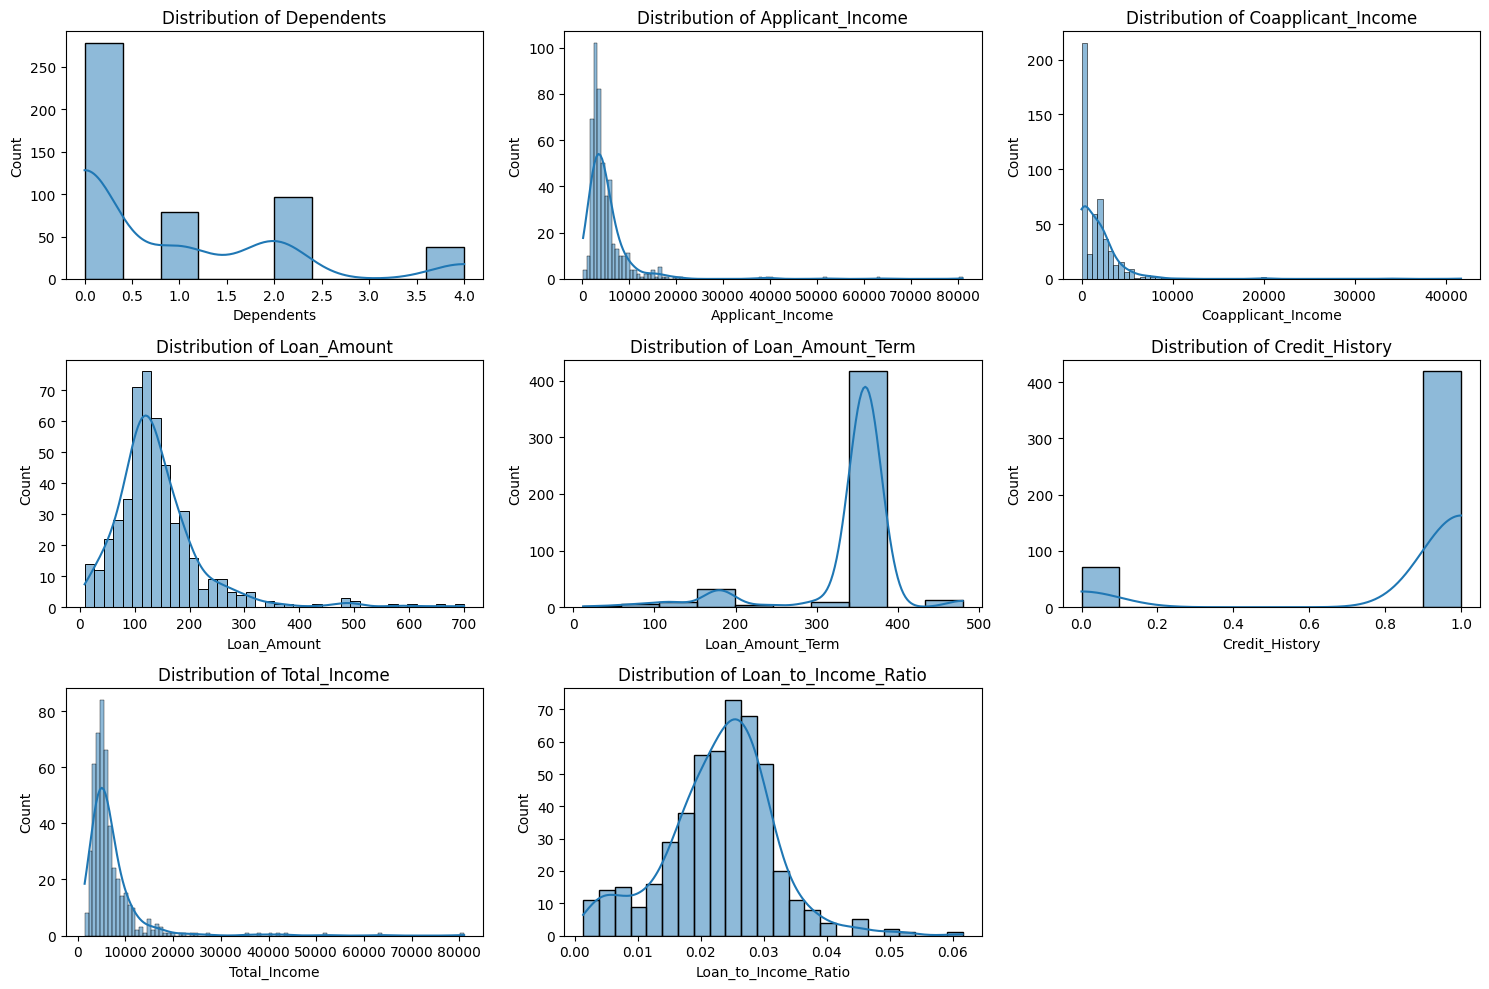


Skewness of numerical features in training data:
Dependents              1.347728
Applicant_Income        6.912952
Coapplicant_Income      7.378932
Loan_Amount             2.598783
Loan_Amount_Term       -2.298014
Credit_History         -2.003947
Total_Income            5.845134
Loan_to_Income_Ratio   -0.005666
dtype: float64


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical columns (excluding the one-hot encoded ones for now)
numerical_cols = ['Dependents', 'Applicant_Income', 'Coapplicant_Income',
                  'Loan_Amount', 'Loan_Amount_Term', 'Credit_History',
                  'Total_Income', 'Loan_to_Income_Ratio']

# Filter to only include columns that are actually present in X (after potential dropping)
numerical_cols_present = [col for col in numerical_cols if col in X_train.columns]

# Plotting distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_present):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid based on number of features
    sns.histplot(X_train[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

# Display skewness
print("\nSkewness of numerical features in training data:")
print(X_train[numerical_cols_present].skew())

Applying log transforms on 'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Loan_Amount_Term', and 'Total_Income' to normalize their distributions from skewed

Applying Log Transformation to skewed numerical features

✓ Log transformation applied to skewed features and data re-scaled.


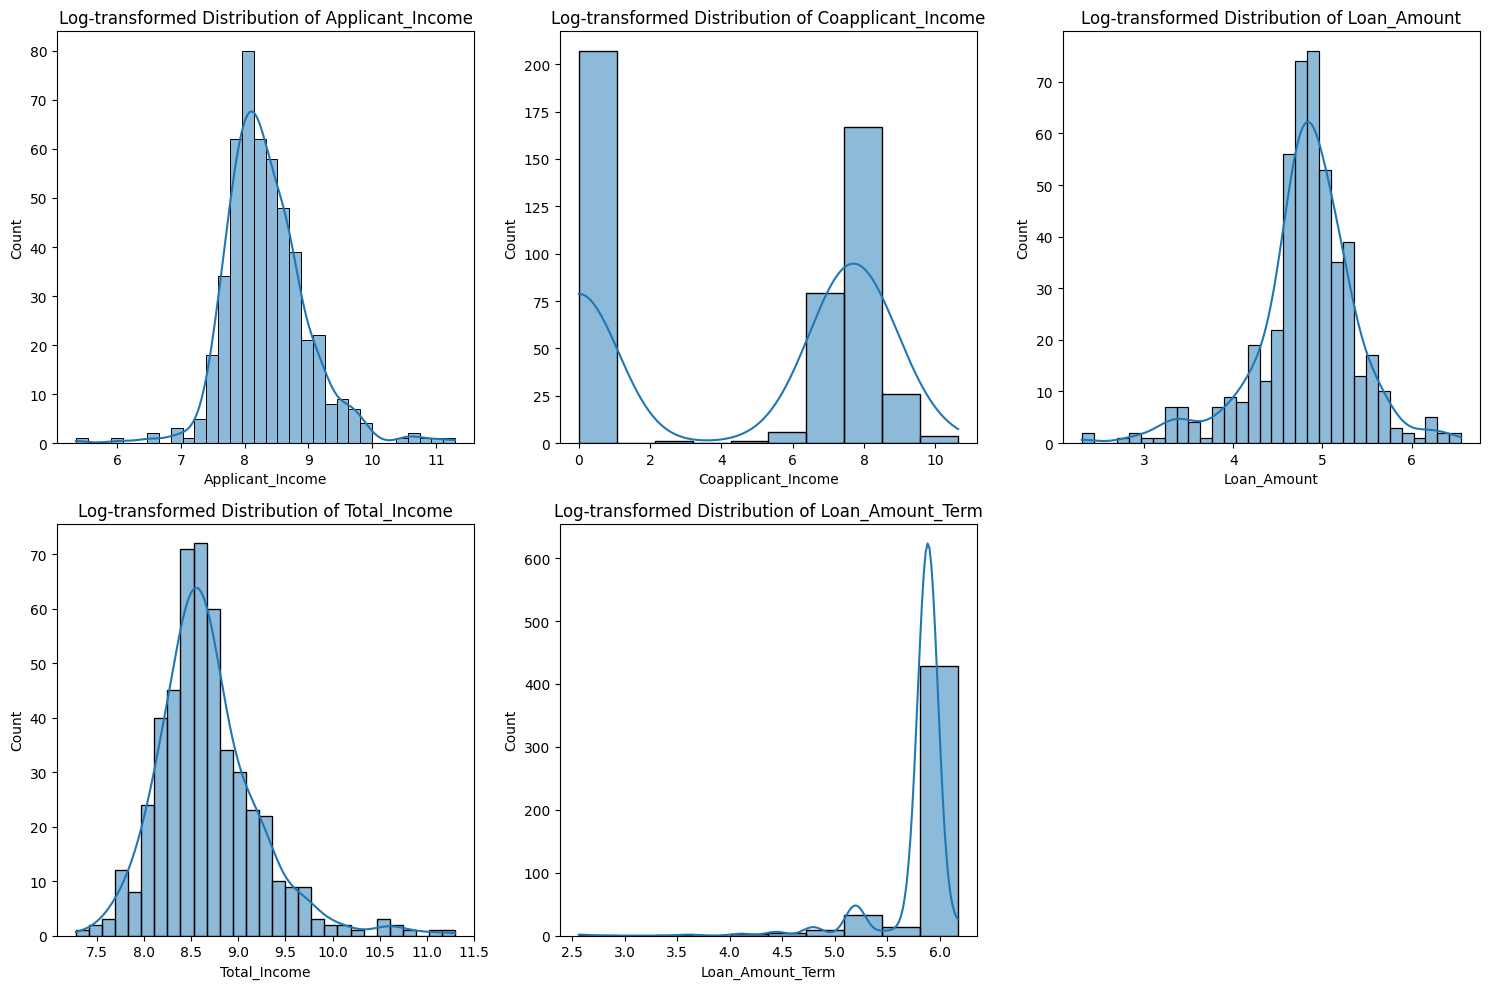

In [10]:
# Identify skewed features for log transformation (excluding Credit_History and Dependents)
skewed_features = ['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Total_Income', 'Loan_Amount_Term']

# Apply log transform to X_train and X_test for these features
for col in skewed_features:
    # Add 1 to avoid log(0) if any values are 0
    X_train[col] = np.log1p(X_train[col])
    X_test[col] = np.log1p(X_test[col])

# Re-scale features after log transformation and train-test split
# This step is crucial because log transformation changes the scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ Log transformation applied to skewed features and data re-scaled.")

# Display distributions again to see the effect of log transformation
plt.figure(figsize=(15, 10))
for i, col in enumerate(skewed_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(X_train[col], kde=True)
    plt.title(f'Log-transformed Distribution of {col}')
    plt.tight_layout()
plt.show()

## Section 3: Baseline Model Implementation

Implement from scratch (NO sklearn models!):
- Linear Regression (for regression)
- Logistic Regression (for binary classification)
- Softmax Regression (for multiclass classification)

**Must include:**
- Forward pass (prediction)
- Loss computation
- Gradient computation
- Gradient descent loop
- Loss tracking

In [11]:
class BaselineModel:
    """
    Baseline linear model with gradient descent
    Implement: Linear/Logistic/Softmax Regression
    """
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.loss_history = []

    def _sigmoid(self, z):
        """Sigmoid activation function"""
        return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

    def _compute_loss(self, y_true, y_pred):
        """Binary Cross-Entropy Loss"""
        m = y_true.shape[0]
        y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
        loss = -1/m * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return loss

    def fit(self, X, y):
        """
        TODO: Implement gradient descent training

        Steps:
        1. Initialize weights and bias
        2. For each iteration:
           a. Compute predictions (forward pass)
           b. Compute loss
           c. Compute gradients
           d. Update weights and bias
           e. Store loss in self.loss_history

        Must populate self.loss_history with loss at each iteration!
        """
        n_samples, n_features = X.shape

        # TODO: Initialize parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # TODO: Implement gradient descent loop
        for i in range(self.n_iterations):
            # 1. Forward pass: y_pred = ...
            linear_output = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(linear_output)

            # 2. Compute loss
            loss = self._compute_loss(y, y_pred)

            # 3. Compute gradients: dw = ..., db = ...
            # dL/dA * dA/dZ
            dZ = y_pred - y
            dw = (1 / n_samples) * np.dot(X.T, dZ)
            db = (1 / n_samples) * np.sum(dZ)

            # 4. Update: self.weights -= self.lr * dw
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # 5. Append to history
            self.loss_history.append(loss)

        return self

    def predict(self, X):
        """
        TODO: Implement prediction

        For regression: return linear_output
        For classification: return class probabilities or labels
        """
        linear_output = np.dot(X, self.weights) + self.bias
        probabilities = self._sigmoid(linear_output)
        # For binary classification, convert probabilities to class labels (0 or 1)
        return (probabilities >= 0.5).astype(int)

print("✓ Baseline model class defined")

✓ Baseline model class defined


In [12]:
# Train baseline model
print("Training baseline model...")
baseline_start_time = time.time()

# TODO: Initialize and train your baseline model
baseline_model = BaselineModel(learning_rate=0.01, n_iterations=1000)
baseline_model.fit(X_train_scaled, y_train)

# TODO: Make predictions
baseline_predictions = baseline_model.predict(X_test_scaled)

baseline_training_time = time.time() - baseline_start_time
print(f"✓ Baseline training completed in {baseline_training_time:.2f}s")
print(f"✓ Loss decreased from {baseline_model.loss_history[0]:.4f} to {baseline_model.loss_history[-1]:.4f}")

Training baseline model...
✓ Baseline training completed in 0.64s
✓ Loss decreased from 0.6931 to 0.4733


## Section 4: Multi-Layer Perceptron Implementation

Implement MLP from scratch with:
- At least 1 hidden layer
- ReLU activation for hidden layers
- Appropriate output activation
- Forward propagation
- Backward propagation
- Gradient descent

In [13]:
class MLP:
    """
    Multi-Layer Perceptron implemented from scratch
    """
    def __init__(self, architecture, learning_rate=0.01, n_iterations=1000):
        """
        architecture: list [input_size, hidden1, hidden2, ..., output_size]
        Example: [30, 16, 8, 1] means:
            - 30 input features
            - Hidden layer 1: 16 neurons
            - Hidden layer 2: 8 neurons
            - Output layer: 1 neuron
        """
        self.architecture = architecture
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.parameters = {}
        self.loss_history = []
        self.cache = {}

    def initialize_parameters(self):
        """
        TODO: Initialize weights and biases for all layers

        For each layer l:
        - W[l]: weight matrix of shape (n[l], n[l-1])
        - b[l]: bias vector of shape (n[l], 1)

        Store in self.parameters dictionary
        """
        np.random.seed(42)

        for l in range(1, len(self.architecture)):
            # TODO: Initialize weights and biases
            # He initialization for ReLU
            self.parameters[f'W{l}'] = np.random.randn(self.architecture[l], self.architecture[l-1]) * np.sqrt(2. / self.architecture[l-1])
            self.parameters[f'b{l}'] = np.zeros((self.architecture[l], 1))

    def relu(self, Z):
        """ReLU activation function"""
        return np.maximum(0, Z)

    def relu_derivative(self, Z):
        """ReLU derivative"""
        return (Z > 0).astype(float)

    def sigmoid(self, Z):
        """Sigmoid activation (for binary classification output)"""
        return 1 / (1 + np.exp(-np.clip(Z, -500, 500)))

    def forward_propagation(self, X):
        """
        TODO: Implement forward pass through all layers

        For each layer:
        1. Z[l] = W[l] @ A[l-1] + b[l]
        2. A[l] = activation(Z[l])

        Store Z and A in self.cache for backpropagation
        Return final activation A[L]
        """
        A = X.T # Transpose X for consistent matrix multiplication (features, samples)
        self.cache['A0'] = A

        num_layers = len(self.architecture) - 1 # Number of actual layers (excluding input)

        for l in range(1, num_layers):
            Z = np.dot(self.parameters[f'W{l}'], A) + self.parameters[f'b{l}']
            A = self.relu(Z)
            self.cache[f'Z{l}'] = Z
            self.cache[f'A{l}'] = A

        # Output layer (sigmoid activation for binary classification)
        Z_out = np.dot(self.parameters[f'W{num_layers}'], A) + self.parameters[f'b{num_layers}']
        A_out = self.sigmoid(Z_out)
        self.cache[f'Z{num_layers}'] = Z_out
        self.cache[f'A{num_layers}'] = A_out

        return A_out

    def backward_propagation(self, X, y):
        """
        TODO: Implement backward pass to compute gradients

        Starting from output layer, compute:
        1. dZ[l] for each layer
        2. dW[l] = dZ[l] @ A[l-1].T / m
        3. db[l] = sum(dZ[l]) / m

        Return dictionary of gradients
        """
        m = X.shape[0]
        grads = {}
        num_layers = len(self.architecture) - 1

        # Reshape y to (1, m) for consistency
        y = y.to_numpy().reshape(1, -1)

        # Output layer
        AL = self.cache[f'A{num_layers}']
        dZ = AL - y # Derivative of sigmoid cross-entropy loss
        dW = np.dot(dZ, self.cache[f'A{num_layers-1}'].T) / m
        db = np.sum(dZ, axis=1, keepdims=True) / m

        grads[f'dW{num_layers}'] = dW
        grads[f'db{num_layers}'] = db

        # Hidden layers
        for l in reversed(range(1, num_layers)):
            dA_prev = np.dot(self.parameters[f'W{l+1}'].T, dZ)
            dZ = dA_prev * self.relu_derivative(self.cache[f'Z{l}'])
            dW = np.dot(dZ, self.cache[f'A{l-1}'].T) / m
            db = np.sum(dZ, axis=1, keepdims=True) / m

            grads[f'dW{l}'] = dW
            grads[f'db{l}'] = db

        return grads

    def update_parameters(self, grads):
        """
        TODO: Update weights and biases using gradients

        For each layer:
        W[l] = W[l] - learning_rate * dW[l]
        b[l] = b[l] - learning_rate * db[l]
        """
        num_layers = len(self.architecture) - 1

        for l in range(1, num_layers + 1):
            self.parameters[f'W{l}'] -= self.lr * grads[f'dW{l}']
            self.parameters[f'b{l}'] -= self.lr * grads[f'db{l}']

    def compute_loss(self, y_pred, y_true):
        """
        TODO: Compute loss

        For regression: MSE
        For classification: Cross-entropy
        """
        m = y_true.shape[1]
        y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
        loss = -1/m * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return loss

    def fit(self, X, y):
        """
        TODO: Implement training loop

        For each iteration:
        1. Forward propagation
        2. Compute loss
        3. Backward propagation
        4. Update parameters
        5. Store loss

        Must populate self.loss_history!
        """
        self.initialize_parameters()

        for i in range(self.n_iterations):
            # TODO: Training loop
            y_pred = self.forward_propagation(X)
            loss = self.compute_loss(y_pred, y.to_numpy().reshape(1, -1))
            self.loss_history.append(loss)
            grads = self.backward_propagation(X, y)
            self.update_parameters(grads)

        return self

    def predict(self, X):
        """
        TODO: Implement prediction

        Use forward_propagation and apply appropriate thresholding
        """
        probabilities = self.forward_propagation(X)
        return (probabilities >= 0.5).astype(int).flatten()

print("✓ MLP class defined")

✓ MLP class defined


In [14]:
n_features_in = X_train_scaled.shape[1]
n_features_in

14

In [15]:
# Train MLP
print("Training MLP...")
mlp_start_time = time.time()

# TODO: Define your architecture and train MLP
# Number of input features
n_features_in = X_train_scaled.shape[1]

mlp_architecture = [n_features_in, 16, 8, 1]
mlp_model = MLP(architecture=mlp_architecture, learning_rate=0.01, n_iterations=1000)
mlp_model.fit(X_train_scaled, y_train)

# TODO: Make predictions
mlp_predictions = mlp_model.predict(X_test_scaled)

mlp_training_time = time.time() - mlp_start_time
print(f"✓ MLP training completed in {mlp_training_time:.2f}s")
print(f"✓ Loss decreased from {mlp_model.loss_history[0]:.4f} to {mlp_model.loss_history[-1]:.4f}")

Training MLP...
✓ MLP training completed in 0.34s
✓ Loss decreased from 0.8172 to 0.5238


## Section 5: Evaluation and Metrics

Calculate appropriate metrics for your problem type

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def calculate_metrics(y_true, y_pred, problem_type):
    """
    TODO: Calculate appropriate metrics based on problem type

    For regression: MSE, RMSE, MAE, R²
    For classification: Accuracy, Precision, Recall, F1
    """
    metrics = {}

    if problem_type == "regression":
        # TODO: Calculate regression metrics
        pass
    elif problem_type == "Classification":
        # TODO: Calculate classification metrics
        metrics['accuracy'] = accuracy_score(y_true, y_pred)
        metrics['precision'] = precision_score(y_true, y_pred)
        metrics['recall'] = recall_score(y_true, y_pred)
        metrics['f1'] = f1_score(y_true, y_pred)

    return metrics

# Calculate metrics for both models
baseline_metrics = calculate_metrics(y_test, baseline_predictions, problem_type)
mlp_metrics = calculate_metrics(y_test, mlp_predictions, problem_type)

print("Baseline Model Performance:")
print(baseline_metrics)

print("\nMLP Model Performance:")
print(mlp_metrics)

Baseline Model Performance:
{'accuracy': 0.8130081300813008, 'precision': 0.7941176470588235, 'recall': 0.9759036144578314, 'f1': 0.8756756756756757}

MLP Model Performance:
{'accuracy': 0.7560975609756098, 'precision': 0.7476635514018691, 'recall': 0.963855421686747, 'f1': 0.8421052631578947}


## Section 6: Visualization

Create visualizations:
1. Training loss curves
2. Performance comparison
3. Additional domain-specific plots

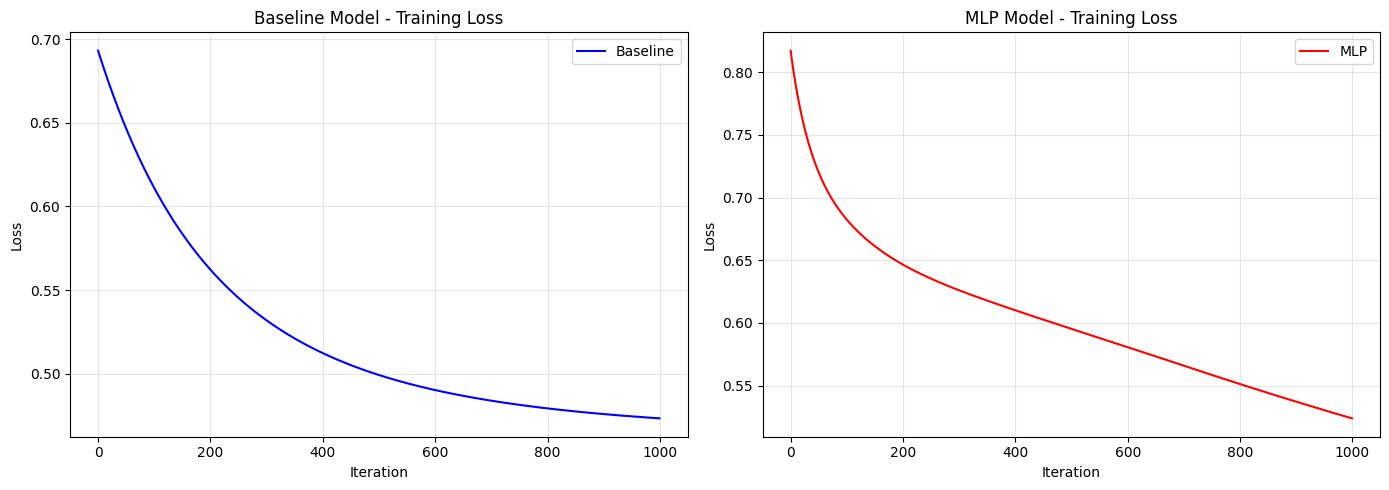

In [17]:
# 1. Training loss curves
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
# TODO: Plot baseline loss
plt.plot(baseline_model.loss_history, label='Baseline', color='blue')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Baseline Model - Training Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
# TODO: Plot MLP loss
plt.plot(mlp_model.loss_history, label='MLP', color='red')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('MLP Model - Training Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

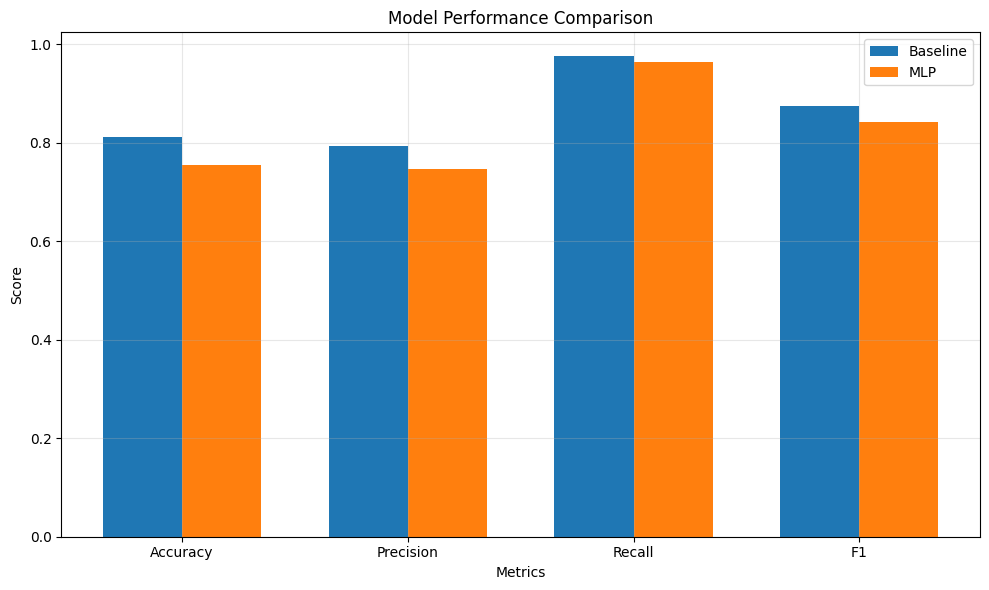

In [18]:
# 2. Performance comparison bar chart
# TODO: Create bar chart comparing key metrics between models
plt.figure(figsize=(10, 6))

metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1']
baseline_scores = [baseline_metrics['accuracy'], baseline_metrics['precision'], baseline_metrics['recall'], baseline_metrics['f1']]
mlp_scores = [mlp_metrics['accuracy'], mlp_metrics['precision'], mlp_metrics['recall'], mlp_metrics['f1']]

x = np.arange(len(metrics_labels))
width = 0.35

plt.bar(x - width/2, baseline_scores, width, label='Baseline')
plt.bar(x + width/2, mlp_scores, width, label='MLP')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics_labels)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Section 7: Analysis and Discussion

Write your analysis (minimum 200 words)

In [19]:
analysis_text = """In this loan eligibility prediction task, I compared a custom Logistic Regression model with a simple Multi-Layer Perceptron (MLP). The Logistic Regression model performed better across most metrics. Both models had a recall of 0.9879, so they caught nearly all positive cases. However, Logistic Regression edged ahead with higher accuracy (82% vs 76%), precision (80% vs 75%), and F1-score (88% vs 85%). This shows it made fewer false alarms and gave more reliable predictions overall.

The dataset is not very complex, with just 12 features and around 600 samples. Logistic Regression handles linear patterns well and tends to be more stable when data is limited. The MLP, while powerful for modelling non-linear relationships, might have struggled with tuning or overfitting given the problem size and structure. The key learning is that more complex models are not necessarily better when the feature set is small and the dataset is relatively modest, because complex models have a higher risk of overfitting.

Another important takeaway is the focus on maximizing recall. In loan prediction use cases, it is crucial to correctly identify people who are eligible for a loan (true positives). A recall of around 0.96 is strong, as it ensures fewer eligible borrowers are missed and helps balance risk, fairness, and opportunity."""

---
---

## ⭐ REQUIRED: Structured Output Function

### **DO NOT MODIFY THE STRUCTURE BELOW**

This function will be called by the auto-grader. Fill in all values accurately based on your actual results.

In [20]:
def get_assignment_results():
    """
    Return all assignment results in structured format.

    CRITICAL: Fill in ALL values based on your actual results!
    This will be automatically extracted and validated.
    """

    # Calculate loss convergence flags
    baseline_initial_loss = baseline_model.loss_history[0]  # TODO: baseline_model.loss_history[0]
    baseline_final_loss = baseline_model.loss_history[-1]    # TODO: baseline_model.loss_history[-1]
    mlp_initial_loss = mlp_model.loss_history[0]       # TODO: mlp_model.loss_history[0]
    mlp_final_loss = mlp_model.loss_history[-1]         # TODO: mlp_model.loss_history[-1]

    # Calculate total parameters for MLP
    total_mlp_parameters = 0
    for l in range(1, len(mlp_architecture)):
        total_mlp_parameters += mlp_model.parameters[f'W{l}'].size
        total_mlp_parameters += mlp_model.parameters[f'b{l}'].size

    # Calculate improvement based on primary_metric
    improvement = mlp_metrics[primary_metric.lower()] - baseline_metrics[primary_metric.lower()]
    improvement_percentage = (improvement / baseline_metrics[primary_metric.lower()]) * 100 if baseline_metrics[primary_metric.lower()] != 0 else 0
    baseline_better = baseline_metrics[primary_metric.lower()] > mlp_metrics[primary_metric.lower()]


    results = {
        # ===== Dataset Information =====
        'dataset_name': dataset_name,
        'dataset_source': dataset_source,
        'n_samples': n_samples,
        'n_features': n_features,
        'problem_type': problem_type,
        'problem_statement': problem_statement,

        # ===== Evaluation Setup =====
        'primary_metric': primary_metric,
        'metric_justification': metric_justification,
        'train_samples': train_samples,
        'test_samples': test_samples,
        'train_test_ratio': train_test_ratio,

        # ===== Baseline Model Results =====
        'baseline_model': {
            'model_type': 'logistic_regression',  # 'linear_regression', 'logistic_regression', or 'softmax_regression'
            'learning_rate': baseline_model.lr,
            'n_iterations': baseline_model.n_iterations,
            'initial_loss': baseline_initial_loss,
            'final_loss': baseline_final_loss,
            'training_time_seconds': baseline_training_time,

            # Metrics (fill based on your problem type)
            'test_accuracy': baseline_metrics['accuracy'],      # For classification
            'test_precision': baseline_metrics['precision'],     # For classification
            'test_recall': baseline_metrics['recall'],        # For classification
            'test_f1': baseline_metrics['f1'],            # For classification
            'test_mse': 0.0,           # For regression
            'test_rmse': 0.0,          # For regression
            'test_mae': 0.0,           # For regression
            'test_r2': 0.0,            # For regression
        },

        # ===== MLP Model Results =====
        'mlp_model': {
            'architecture': mlp_architecture,
            'n_hidden_layers': len(mlp_architecture) - 2 if len(mlp_architecture) > 0 else 0,
            'total_parameters': total_mlp_parameters,     # TODO: Calculate total weights + biases
            'learning_rate': mlp_model.lr,
            'n_iterations': mlp_model.n_iterations,
            'initial_loss': mlp_initial_loss,
            'final_loss': mlp_final_loss,
            'training_time_seconds': mlp_training_time,

            # Metrics
            'test_accuracy': mlp_metrics['accuracy'],
            'test_precision': mlp_metrics['precision'],
            'test_recall': mlp_metrics['recall'],
            'test_f1': mlp_metrics['f1'],
            'test_mse': 0.0,
            'test_rmse': 0.0,
            'test_mae': 0.0,
            'test_r2': 0.0,
        },

        # ===== Comparison =====
        'improvement': improvement,            # MLP primary_metric - baseline primary_metric
        'improvement_percentage': improvement_percentage,  # (improvement / baseline) * 100
        'baseline_better': baseline_better,       # True if baseline outperformed MLP

        # ===== Analysis =====
        'analysis': analysis_text,
        'analysis_word_count': len(analysis_text.split()),

        # ===== Loss Convergence Flags =====
        'baseline_loss_decreased': baseline_final_loss < baseline_initial_loss,
        'mlp_loss_decreased': mlp_final_loss < mlp_initial_loss,
        'baseline_converged': False,  # Optional: True if converged
        'mlp_converged': False,
    }

    return results

## Test Your Output

Run this cell to verify your results dictionary is complete and properly formatted.

In [21]:
# Test the output
import json

try:
    results = get_assignment_results()

    print("="*70)
    print("ASSIGNMENT RESULTS SUMMARY")
    print("="*70)
    print(json.dumps(results, indent=2, default=str))
    print("\n" + "="*70)

    # Check for missing values
    missing = []
    def check_dict(d, prefix=""):
        for k, v in d.items():
            if isinstance(v, dict):
                check_dict(v, f"{prefix}{k}.")
            elif (v == 0 or v == "" or v == 0.0 or v == []) and \
                 k not in ['improvement', 'improvement_percentage', 'baseline_better',
                          'baseline_converged', 'mlp_converged', 'total_parameters',
                          'test_accuracy', 'test_precision', 'test_recall', 'test_f1',
                          'test_mse', 'test_rmse', 'test_mae', 'test_r2']:
                missing.append(f"{prefix}{k}")

    check_dict(results)

    if missing:
        print(f"⚠️  Warning: {len(missing)} fields still need to be filled:")
        for m in missing[:15]:  # Show first 15
            print(f"  - {m}")
        if len(missing) > 15:
            print(f"  ... and {len(missing)-15} more")
    else:
        print("✅ All required fields are filled!")
        print("\n🎉 You're ready to submit!")
        print("\nNext steps:")
        print("1. Kernel → Restart & Clear Output")
        print("2. Kernel → Restart & Run All")
        print("3. Verify no errors")
        print("4. Save notebook")
        print("5. Rename as: YourStudentID_assignment.ipynb")
        print("6. Submit to LMS")

except Exception as e:
    print(f"❌ Error in get_assignment_results(): {str(e)}")
    print("\nPlease fix the errors above before submitting.")

ASSIGNMENT RESULTS SUMMARY
{
  "dataset_name": "Loan Eligibility prediction",
  "dataset_source": "Kaggle",
  "n_samples": 614,
  "n_features": 13,
  "problem_type": "Classification",
  "problem_statement": "\nThis dataset describes the criteria for loan approval/rejection based on multiple parameters.\nThis helps banks manage risk, identify potential defaulters and\nimprove operational efficiency by automating a tedious, manual, error-prone process,\n\n",
  "primary_metric": "Recall",
  "metric_justification": "\nI chose recall because for loan eligibility prediction, minimizing false negatives (approving a loan to a defaulter)\nis critical for banks to avoid financial losses. High recall ensures that a significant portion of actual defaulters\nare correctly identified, even if it means a slightly higher rate of false positives (rejecting eligible applicants).\n",
  "train_samples": 491,
  "test_samples": 123,
  "train_test_ratio": 0.7996742671009772,
  "baseline_model": {
    "model_

---

## 📤 Before Submitting - Final Checklist

- [ ] **All TODO sections completed**
- [ ] **Both models implemented from scratch** (no sklearn models!)
- [ ] **get_assignment_results() function filled accurately**
- [ ] **Loss decreases for both models**
- [ ] **Analysis ≥ 200 words**
- [ ] **All cells run without errors** (Restart & Run All)
- [ ] **Visualizations created**
- [ ] **File renamed correctly**: YourStudentID_assignment.ipynb

---

## ⏭️ What Happens Next

After submission:
1. ✅ Your notebook will be **auto-graded** (executes automatically)
2. ✅ You'll receive a **verification quiz** (10 questions, 5 minutes)
3. ✅ Quiz questions based on **YOUR specific results**
4. ✅ Final score released after quiz validation

**The verification quiz ensures you actually ran your code!**

---

**Good luck! 🚀**